In [2]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
import altair as alt
import geopandas as gpd
import matplotlib.pyplot as plt
import json
import altair as alt

IPC comparison

In [3]:
ipc_pse= pd.read_csv('ipc/ipc_pse_national_long.csv').iloc[1:]#API?
ipc_dji= pd.read_csv('ipc/ipc_dji_national_long.csv').iloc[1:]#API?
ipc_sdn= pd.read_csv('ipc/ipc_sdn_national_long.csv').iloc[1:]#API?
ipc_yem= pd.read_csv('ipc/ipc_yem_national_long.csv').iloc[1:]#API?
ipc_lbn= pd.read_csv('ipc/ipc_lbn_national_long.csv').iloc[1:]#API?

In [4]:
dfs = [ipc_pse, ipc_dji, ipc_sdn, ipc_yem, ipc_lbn]
ipc_countries = pd.concat(dfs, ignore_index = True)


In [5]:
ipc_countries = ipc_countries[(ipc_countries['Validity period'] == 'current') & (ipc_countries['Phase'].isin(['3', '4', '5']))].reset_index(drop=True)
ipc_countries['Date of analysis'] = pd.to_datetime(ipc_countries['Date of analysis'])
ipc_countries['Date of analysis'].dt.to_period('4M')
ipc_countries.head()

/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_16042/3939878536.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ipc_countries['Date of analysis'] = pd.to_datetime(ipc_countries['Date of analysis'])


,Date of analysis,Country,Total country population,Validity period,From,To,Phase,Number,Percentage
0,2024-09-01,PSE,2251457,current,2024-09-01,2024-10-31,3,1044353,0.49
1,2024-09-01,PSE,2251457,current,2024-09-01,2024-10-31,4,663721,0.31
2,2024-09-01,PSE,2251457,current,2024-09-01,2024-10-31,5,132987,0.06
3,2024-05-01,PSE,2251457,current,2024-05-01,2024-06-30,3,1148301,0.51
4,2024-05-01,PSE,2251457,current,2024-05-01,2024-06-30,4,642864,0.29


In [7]:
#ipc_countries['Quarter'] = ipc_countries['Quarter'].astype(str)
#quarter_dropdown = alt.binding_select(options=ipc_countries['Quarter'].unique(), name='Quarter: ')
#quarter_selection = alt.selection_point(fields=['Quarter'], bind=quarter_dropdown, value='2024Q3')

# Create the stacked bar chart
chart = alt.Chart(ipc_countries).mark_bar().encode(
    x=alt.X('Country:N', title='Country'),
    y=alt.Y('sum(Number):Q', title='Total Number'),
    color=alt.Color('Phase:N', title='Phase', scale=alt.Scale(scheme='category10')),
    tooltip=['Country', 'Phase', 'sum(Number)']
#).transform_filter(
  #  quarter_selection
).properties(
    width=600,
    height=400,
    title='Stacked Bar Chart by Phase for Selected Quarter'
#).add_selection(
  #  quarter_selection
#)

#chart

KeyError: 'Quarter'

FEWS

In [8]:
response = requests.get('https://fdw.fews.net/api/ipcphase/?format=json&country_code=SS&country_code=SD&country_code=LB&country_code=YE&country_code=DJ&preference=best&fields=simple')
data = response.json()

In [9]:
ipc_fews = pd.json_normalize(data)
ipc_fews = ipc_fews.drop(columns=['source_document', 'data_usage_policy', 'status', 'id', 'collection_schedule', 'collection_status'])

In [10]:
ipc_fews_yem = ipc_fews[(ipc_fews['scenario_name'] == 'Current Situation') & (ipc_fews['country'] == 'Yemen')]
ipc_fews_yem.head()

,source_organization,country,country_code,geographic_group,fewsnet_region,geographic_unit_name,classification_scale,scenario_name,is_allowing_for_assistance,projection_start,projection_end,value,description,scenario,reporting_date,dataseries_name,geographic_unit_full_name
3891,FEWS NET,Yemen,YE,Western Asia,Middle East and Asia,"Amran Rainfed Sorghum, Barley, Qat, and Livest...",IPC 2.0,Current Situation,False,2014-10-01,2014-10-31,2.0,Stressed,CS,2014-10-01,"Amran Rainfed Sorghum, Barley, Qat, and Livest...","Amran Rainfed Sorghum, Barley, Qat, and Livest..."
3892,FEWS NET,Yemen,YE,Western Asia,Middle East and Asia,"Amran Rainfed Sorghum, Barley, Qat, and Livest...",IPC 2.0,Current Situation,False,2015-01-01,2015-01-31,2.0,Stressed,CS,2015-01-01,"Amran Rainfed Sorghum, Barley, Qat, and Livest...","Amran Rainfed Sorghum, Barley, Qat, and Livest..."
3893,FEWS NET,Yemen,YE,Western Asia,Middle East and Asia,"Amran Rainfed Sorghum, Barley, Qat, and Livest...",IPC 2.0,Current Situation,True,2015-04-01,2015-04-30,2.0,Stressed,CS,2015-04-01,"Amran Rainfed Sorghum, Barley, Qat, and Livest...","Amran Rainfed Sorghum, Barley, Qat, and Livest..."
3894,FEWS NET,Yemen,YE,Western Asia,Middle East and Asia,"Amran Rainfed Sorghum, Barley, Qat, and Livest...",IPC 2.0,Current Situation,False,2015-07-01,2015-07-31,3.0,Crisis,CS,2015-07-01,"Amran Rainfed Sorghum, Barley, Qat, and Livest...","Amran Rainfed Sorghum, Barley, Qat, and Livest..."
3895,FEWS NET,Yemen,YE,Western Asia,Middle East and Asia,"Amran Rainfed Sorghum, Barley, Qat, and Livest...",IPC 2.0,Current Situation,False,2015-10-01,2015-10-31,3.0,Crisis,CS,2015-10-01,"Amran Rainfed Sorghum, Barley, Qat, and Livest...","Amran Rainfed Sorghum, Barley, Qat, and Livest..."


IPC all countries

In [11]:
df = pd.read_excel('all-countries-2017-2023.xlsx', skiprows=11, usecols='A:W')

In [12]:
df.rename(columns={ 'Country Population': 'population',
                   '#': 'population_analyzed', '% of total county Pop': 'pop_per',
                   '#.1':'phase1_abs', '%':'phase1_per', 
                   '#.2':'#phase2_abs', '%.1':'phase2_abs',
                    '#.3':'phase3_abs', '%.2':'phase3_per',
                    '#.4':'phase4_abs', '%.3':'phase4_per',
                    '#.5':'phase5_abs', '%.4':'phase5_per',
                    '#.6':'phase3plus_abs', '%.5':'phase3plus_per',
                    'Date of Analysis':'date'}, inplace=True)


In [13]:
#remove rows with NaN values in the 'Country' column
df = df.dropna(subset=['Country'])

#make a seperate df full country data
df_countries = df[df['Area'].isna()]

#convert date to datetime (mm-yyyy)
df_countries['date'] = df_countries['date'].str.replace(' ', '')
df_countries['date'] = pd.to_datetime(df_countries['date'])

#keep only rows where country contains the term "acute food insecurity"
df_countries = df_countries[df_countries['Country'].str.contains('Acute Food Insecurity')]
df_countries['Country'] = df_countries['Country'].str.split(':').str[0]

/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_16042/885936146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['date'] = df_countries['date'].str.replace(' ', '')
/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_16042/885936146.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_countries['date'] = pd.to_datetime(df_countries['date'])
/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_16042/885936146.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [14]:
df_countries['Country'].nunique()

32

In [15]:
#keep only Country, population, phase3plus_abs, phase3plus_per, date
df_countries = df_countries[['Country', 'population', 'phase3plus_abs', 'phase3plus_per', 'date', 'Analysis Period']]


In [16]:
#take the strings after - in Analysis Period and save it as end_date
df_countries['end_date'] = df_countries['Analysis Period'].str.split('-').str[1]
df_countries['end_date'] = pd.to_datetime(df_countries['end_date'])
df_countries[df_countries.duplicated(subset=['Country', 'date'], keep=False)]

/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_16042/838935269.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_countries['end_date'] = pd.to_datetime(df_countries['end_date'])


,Country,population,phase3plus_abs,phase3plus_per,date,Analysis Period,end_date
2572,Ethiopia,114964000.0,16756345.0,0.30,2021-05-01,May 2021 - Jun 2021,2021-06-01
2649,Ethiopia,114964000.0,5522943.0,0.61,2021-05-01,May 2021 - Jun 2021,2021-06-01


In [17]:
#turn this into a balanced panel, filled values for phase3plus_per for each date with the same value as the last known date
df_countries_unique = df_countries.drop_duplicates(subset=['Country', 'date'])
df_countries_unique = df_countries_unique.set_index(['Country', 'date']).unstack().stack(dropna=False).reset_index()

In [18]:
# Extract year from date
df_countries_unique['year'] = df_countries_unique['date'].dt.year

# Sort by country, year, and phase3plus_per in descending order
df_countries_unique = df_countries_unique.sort_values(by=['Country', 'year', 'phase3plus_per'], ascending=[True, True, False])

# Keep the highest value per country per year and set the rest as NaN
df_countries_unique = df_countries_unique.groupby(['Country', 'year']).head(1).set_index(['Country', 'year']).reindex(df_countries_unique.set_index(['Country', 'year']).index).reset_index()

# Drop duplicate rows keeping the first occurrence
df_countries_unique = df_countries_unique.drop_duplicates(subset=['Country', 'year'])
df_countries_unique.Country.unique()


array(['Afghanistan', 'Angola', 'Burundi', 'Central African Republic',
       'Congo, DRC', 'Djibouti', 'Dominican Republic', 'El Salvador',
       'Eswatini', 'Ethiopia', 'Guatemala', 'Haiti', 'Honduras', 'Kenya',
       'LAC Region (tri-National)', 'Lebanon', 'Lesotho', 'Madagascar',
       'Malawi', 'Mozambique', 'Namibia', 'Pakistan', 'Somalia',
       'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Uganda', 'Yemen', 'Zambia', 'Zimbabwe'], dtype=object)

In [19]:
url = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/refs/heads/master/all/all.csv'
df_country_codes = pd.read_csv(url)
df_country_codes = df_country_codes[['name', 'alpha-3']]

In [20]:
#merge df_countries with df_country_codes
df_countries = df_countries.merge(df_country_codes, left_on='Country', right_on='name')
df_countries = df_countries.drop(columns=['name'])

#rename alpha-3 to country_code
df_countries.rename(columns={'alpha-3':'country_code'}, inplace=True)

In [21]:
#save as csv
df_countries.to_csv('acutefoodinsecurity.csv', index=False)

Yemen data

In [22]:
acled=requests.get('https://api.acleddata.com/acled/read.json?key=bmoYzVNA-Xl6fWpbI!i8&email=c.abdelgelil@lse.ac.uk&country=Yemen&event_date=2024-01-12|2025-01-01&event_date_where=BETWEEN&limit=3000').json()
acled_yem=pd.DataFrame(acled['data'])

In [48]:
ipc = requests.get('https://api.ipcinfo.org/analyses?country=YE&type=A&key=3bdbeef9-fc4c-4315-a665-cc56deb11be6').json()
ipc


[{'id': '12184859',
  'title': 'Yemen - Acute Food Insecurity March 2017 (Projection)',
  'link': 'http://www.ipcinfo.org/ipc-country-analysis/details-map/en/c/1026467/',
  'country': 'YE',
  'year': 2017,
  'condition': 'A',
  'created': '2018-01-30',
  'modified': '2025-01-03'},
 {'id': '12934754',
  'title': 'Yemen - Acute Food Insecurity December 2018',
  'link': 'http://www.ipcinfo.org/ipc-country-analysis/details-map/en/c/1151858/?iso3=YEM',
  'country': 'YE',
  'year': 2018,
  'condition': 'A',
  'created': '2018-12-07',
  'modified': '2025-01-03'},
 {'id': '13983194',
  'title': 'Yemen - Acute Food Insecurity June 2019 (HotSpot Analysis)',
  'link': 'http://www.ipcinfo.org/ipc-country-analysis/details-map/en/c/1152114/',
  'country': 'YE',
  'year': 2019,
  'condition': 'A',
  'created': '2019-11-26',
  'modified': '2025-01-03'},
 {'id': '18262319',
  'title': 'Yemen - Acute Food Insecurity June 2020 (Partial analysis)',
  'link': 'http://www.ipcinfo.org/ipc-country-analysis/de

In [ ]:
ipc_geoson = requests.get('https://api.ipcinfo.org/areas/64985227/P?format=geojson&key=3bdbeef9-fc4c-4315-a665-cc56deb11be6').json()
ipc_geoson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'aar_id': '64985880',
    'confidence_level': 0,
    'ipc_period': 'P',
    'overall_phase': 3,
    'population_min': '3944',
    'population_percentage_min': '0.35',
    'justification': '',
    'prolonged_crisis': False,
    'population_phase_worse': None,
    'population_percentage_phase_worse': None,
    'anl_id': '64985227',
    'admin_type': None,
    'title': 'Hawf',
    'view_level': 'area',
    'hide_settlement_labels': False,
    'hide_area_labels': False,
    'hide_area_borders': False,
    'show_area_popups': True,
    'color': '#c80000',
    'estimated_population': '11272',
    'phase1_population': 3945,
    'phase1_percent': 0.35,
    'phase1_color': '#fae61e',
    'phase2_population': 3381,
    'phase2_percent': 0.3,
    'phase2_color': '#e67800',
    'phase3_population': 3381,
    'phase3_percent': 0.3,
    'phase3_color': '#c80000',
    'phase4_population': 563,
    'phase4_percent': 0.05

In [ ]:
foodprices = pd.read_csv('yemen/hdx_hapi_food_price_yem.csv').iloc[1:]#turn into API, monthly, only until 2020
wfp_foodprices = pd.read_csv('yemen/wfp_food_prices_yem.csv').iloc[1:]#turn into API, monthly adm1 +2, only until 2020
idp = pd.read_csv('yemen/hdx_hapi_idps_yem.csv').iloc[1:] #turn into API, sep 2023
poverty = pd.read_csv('yemen/hdx_hapi_poverty_rate_yem.csv').iloc[1:] #adm1 yearly
ipc_adm1= pd.read_csv('yemen/ipc_yem_level1_long.csv').iloc[1:] #API? quarterly
ipc_adm2= pd.read_csv('yemen/ipc_yem_area_long.csv').iloc[1:]# find a version with codes
geofile_adm1 = gpd.read_file('yemen/yem_admbnda_adm1_govyem_cso_20191002.json')
geofile_adm2 = gpd.read_file('yemen/yem_admbnda_adm2_govyem_cso_20191002.json')
hunger_map = pd.read_csv('yemen/wfp-hungermap-data-for-yem-long.csv').iloc[1:] #API WORKING!
#demonstrations = pd.read_excel('yemen/yemen_hrp_civilian_targeting_events_and_fatalities_by_month-year_as-of-19dec2024.xlsx', sheet_name='Data') #monthly, adm1 +2
#pol_violence = pd.read_excel('yemen/yemen_hrp_political_violence_events_and_fatalities_by_month-year_as-of-19dec2024.xlsx', sheet_name='Data')

/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_16042/2885461550.py:1: DtypeWarning: Columns (1,2,10,11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  foodprices = pd.read_csv('yemen/hdx_hapi_food_price_yem.csv').iloc[1:]#turn into API, monthly, only until 2020


Hunger map data

In [24]:
hunger_map['adminone'] = hunger_map['adminone'].replace({"Sana'a": "Sanaa", "Taizz": "Taiz", "Al Hudaydah": "Al Hodeidah", "Hadramaut": "Hadramawt", "Sa'ada": "Sadah",
                                                   "Al Dhale'e": "Ad Dali"})

In [25]:
hunger_map_subnat = hunger_map[(hunger_map['indicator name'] == 'fcs') & (hunger_map['adminlevel'] == 'subnational')]
hunger_map_nat = hunger_map[(hunger_map['indicator name'] == 'fcs') & (hunger_map['adminlevel'] == 'national')]

In [26]:
hunger_map_latest = hunger_map[(hunger_map['indicator name'] == 'fcs') & (hunger_map['date'] == '2024-10-30')]
hunger_map_latest = hunger_map_latest.drop_duplicates().reset_index()

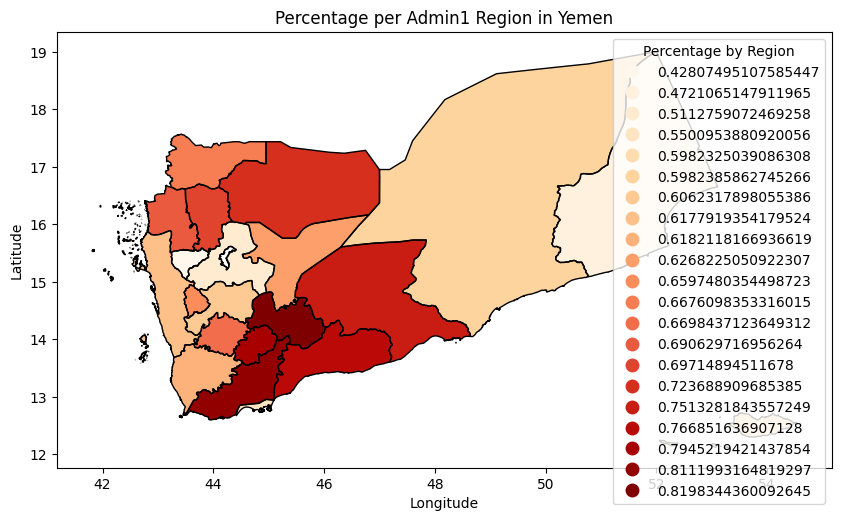

In [ ]:
# Merge dataframes on admin1 region
merged = geofile_adm1.merge(hunger_map_latest, left_on='ADM1REF_EN', right_on='adminone', how='left')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.plot(column='prevalence', ax=ax, legend=True, cmap='OrRd', legend_kwds={'title': "Percentage by Region"})
# Show the borders of the polygons
merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Add titles and labels
plt.title('Hunger Map 2024-10-30 + geo admin1 Percentage per Admin1 Region in Yemen')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [28]:
# Convert 'date' column to datetime
hunger_map_nat['date'] = pd.to_datetime(hunger_map_nat['date'])

# Create the line chart
chart = alt.Chart(hunger_map_nat).mark_line().encode(
    x='date:T',
    y='prevalence:Q',
    tooltip=['date:T', 'prevalence:Q']
).properties(
    title='FCS Over Time'
)

chart

/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_16042/987226192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hunger_map_nat['date'] = pd.to_datetime(hunger_map_nat['date'])


alt.Chart(...)

ACLED data

In [29]:
acled_yem = acled_yem.drop(columns=['event_id_cnty', 'source', 'source_scale', 'notes', 'tags', 'timestamp'])

In [30]:
acled_yem_grouped = acled_yem.groupby(['disorder_type', 'admin1']).size().reset_index(name='count')


In [31]:
# Extract unique values from both columns
acled_admin1_unique = acled_yem_grouped['admin1'].unique()
adm1_en_unique = geofile_adm1['ADM1REF_EN'].unique()

# Find common and different values
common_admin1 = set(acled_admin1_unique).intersection(set(adm1_en_unique))
different_admin1 = set(acled_admin1_unique).difference(set(adm1_en_unique))

print("Common admin1 values:", common_admin1)
print("Different admin1 values:", different_admin1)

Common admin1 values: {'Hajjah', 'Amran', 'Ibb', 'Sanaa', 'Sadah', 'Raymah', 'Al Jawf', 'Aden', 'Shabwah', 'Dhamar', 'Ad Dali', 'Hadramawt', 'Al Bayda', 'Marib', 'Abyan', 'Al Mahwit'}
Different admin1 values: {'', 'Al Mahrah', 'Suqutra', 'Al Hudaydah', 'Amanat al Asimah', 'Taizz', 'Lahij'}


In [32]:
acled_yem_grouped['admin1'] = acled_yem_grouped['admin1'].replace({ "Taizz": "Taiz",
                                                          "Al Hudaydah": "Al Hodeidah", 
                                                          "Lahij": "",
                                                          "Amanat al Asimah": "Sadah",
                                                        "Suqutra": "Socotra",
                                                        "Al Mahrah": "Al Maharah"})

In [33]:

merged_df = pd.merge(acled_yem_grouped, hunger_map_latest, left_on='admin1', right_on='adminone', how='inner')

# Create Altair scatter plot
chart = alt.Chart(merged_df).mark_circle(size=60).encode(
    x='count:Q',
    y='prevalence:Q',
    color='disorder_type:N',
    tooltip=['adminone', 'count', 'prevalence'],
    facet=alt.Facet('disorder_type:N', columns=1)
).properties(
    title='Prevalence vs Count by Disorder Type'
)

chart.show()


alt.Chart(...)

Need to fix Adm data

In [34]:
#For Adm 1
#ipc_adm1['Level 1'] = ipc_adm1['Level 1'].replace({'Ad Dali`': "Ad Dali'", 'Ma`rib': "Ma'rib", 'Ta`iz': "Ta'iz"})
#filtered_ipc = ipc_adm1[(ipc_adm1['Validity period'] == 'current') & (ipc_adm1['From'] == '2024-07-01') & (ipc_adm1['Phase'] == '3+')].reset_index()

# Merge dataframes on admin1 region
#merged = geofile_adm1.merge(filtered_ipc, left_on='ADM1_EN', right_on='Level 1', how='left')

In [35]:
#For Adm 2
filtered_ipc_adm2 = ipc_adm2[(ipc_adm2['Validity period'] == 'current') & (ipc_adm2['From'] == '2024-07-01') & (ipc_adm2['Phase'] == '3+')].reset_index()
merged = geofile_adm2.merge(filtered_ipc_adm2, left_on='ADM2_EN', right_on='Area', how='left')

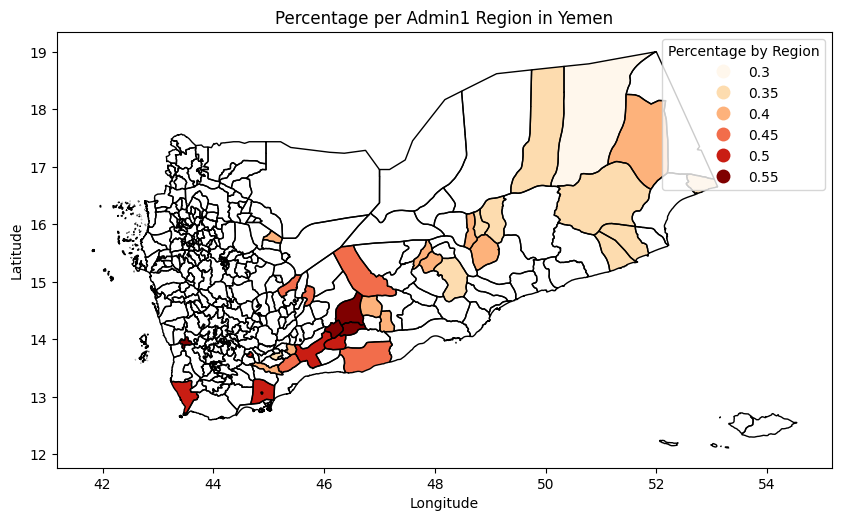

In [ ]:
# Fill missing 'Percentage' values with NaN
merged['Percentage'] = merged['Percentage'].fillna(np.nan)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.plot(column='Percentage', ax=ax, legend=True, cmap='OrRd', legend_kwds={'title': "Percentage by Region"})
# Show the borders of the polygons
merged.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Add titles and labels
plt.title('IPC admin2 + Region in Yemen')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()